<a href="https://colab.research.google.com/github/VishwaJaya01/Intellihack_TechSpark_01/blob/main/weather_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load your data into a DataFrame
weather_df = pd.read_csv('weather_data.csv')

# Show the first few rows
weather_df.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [2]:
# Check basic information and missing values
weather_df.info()
print("\nMissing values:\n", weather_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB

Missing values:
 date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


In [3]:
# Quick check to confirm libraries are available
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("All libraries imported successfully!")


All libraries imported successfully!


In [4]:
# Convert 'date' to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce')

# Encode categorical column 'rain_or_not' to binary numeric
weather_df['rain_or_not'] = weather_df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

# Handle missing numeric values by filling them with mean values
numeric_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']
for col in numeric_cols:
    weather_df[col].fillna(weather_df[col].mean(), inplace=True)

# Check if all issues are resolved
weather_df.info()
weather_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  311 non-null    float64       
 2   humidity         311 non-null    float64       
 3   avg_wind_speed   311 non-null    float64       
 4   rain_or_not      311 non-null    int64         
 5   cloud_cover      311 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 17.1 KB


<ipython-input-4-5d7ece5ca297>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df[col].fillna(weather_df[col].mean(), inplace=True)


,0
date,0
avg_temperature,0
humidity,0
avg_wind_speed,0
rain_or_not,0
cloud_cover,0
pressure,0


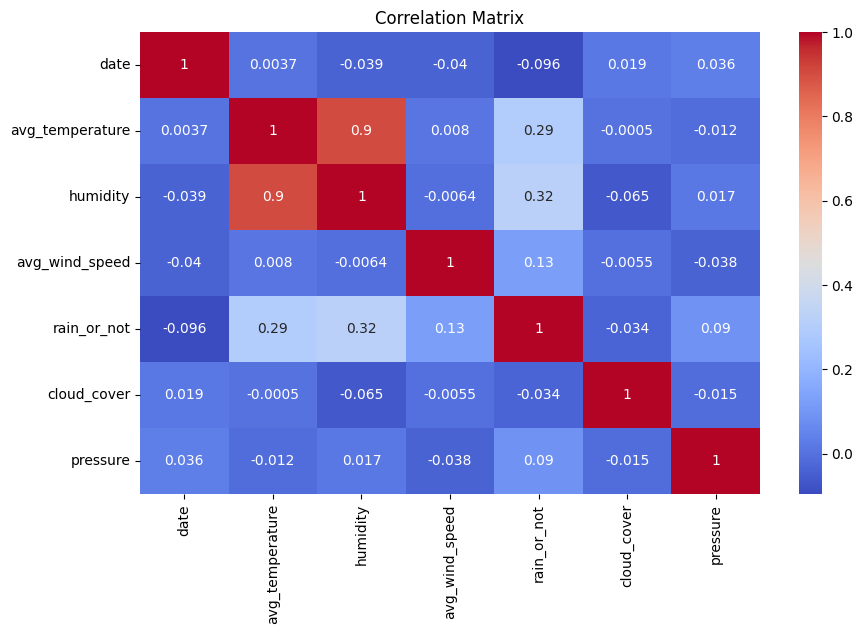

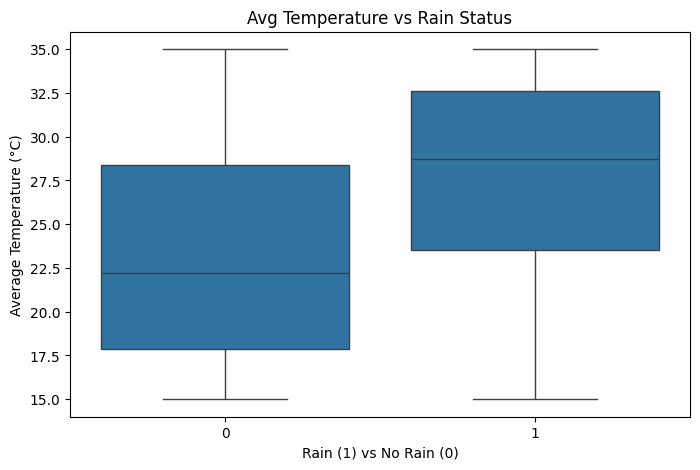

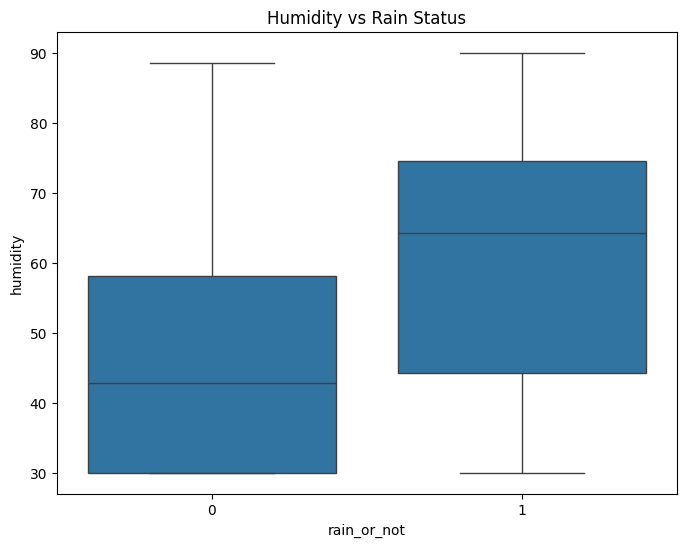

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(weather_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Temperature vs Rain Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='rain_or_not', y='avg_temperature', data=weather_df)
plt.title('Avg Temperature vs Rain Status')
plt.xlabel('Rain (1) vs No Rain (0)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Humidity vs Rain Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='rain_or_not', y='humidity', data=weather_df)
plt.title('Humidity vs Rain Status')
plt.show()


In [6]:
# Define features and target
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
X = weather_df[features]
y = weather_df['rain_or_not']


In [7]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (248, 5)
Testing set size: (63, 5)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        22
           1       0.68      0.66      0.67        41

    accuracy                           0.57        63
   macro avg       0.53      0.53      0.53        63
weighted avg       0.58      0.57      0.57        63



In [9]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search with RandomForestClassifier
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

# Best parameters from GridSearch
print("Best Parameters:", grid_search.best_params_)

# Evaluate optimized model
y_pred_optimized = grid_search.predict(X_test)

# Improved accuracy
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {accuracy_optimized:.2f}")

# Classification report for optimized model
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Optimized Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.42      0.45      0.43        22
           1       0.69      0.66      0.68        41

    accuracy                           0.59        63
   macro avg       0.55      0.56      0.55        63
weighted avg       0.60      0.59      0.59        63



In [10]:
# Feature Engineering: Extract additional date-related features
weather_df['month'] = weather_df['date'].dt.month
weather_df['day_of_week'] = weather_df['date'].dt.dayofweek
weather_df['day_of_month'] = weather_df['date'].dt.day

# Update your feature set with new features
features = [
    'avg_temperature', 'humidity', 'avg_wind_speed',
    'cloud_cover', 'pressure', 'month', 'day_of_week', 'day_of_month'
]

X = weather_df[features]
y = weather_df['rain_or_not']

# Split again after feature engineering
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
from xgboost import XGBClassifier

# Train XGBoost model with tuned hyperparameters
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy and classification report
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.43      0.41      0.42        22
           1       0.69      0.71      0.70        41

    accuracy                           0.60        63
   macro avg       0.56      0.56      0.56        63
weighted avg       0.60      0.60      0.60        63



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

grid_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

# Display best parameters
print("Best XGBoost Parameters:", grid_xgb.best_params_)

# Evaluate optimized XGB model
y_pred_best_xgb = grid_xgb.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

print(f"Optimized XGBoost Accuracy: {accuracy_best_xgb:.2f}")
print(classification_report(y_test, y_pred_best_xgb))


Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Optimized XGBoost Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        22
           1       0.67      0.68      0.67        41

    accuracy                           0.57        63
   macro avg       0.52      0.52      0.52        63
weighted avg       0.57      0.57      0.57        63



In [13]:
# Quick simplified Grid Search
param_grid_simple = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
}

grid_xgb_simple = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_xgb_simple.fit(X_train, y_train)

print("Best Parameters:", grid_xgb_simple.best_params_)
print(f"Best XGBoost accuracy: {grid_xgb_simple.best_score_:.2f}")


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best XGBoost accuracy: 0.67


In [14]:
# Train the final optimized XGBoost model
final_xgb = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.7,
    random_state=42,
    eval_metric='logloss'
)

final_xgb.fit(X_train, y_train)

# Predict probabilities (important for final submission!)
rain_probabilities = final_xgb.predict_proba(X_test)[:, 1]

# Display the probabilities clearly
prob_df = pd.DataFrame({
    'Actual': y_test,
    'Rain_Probability': rain_probabilities
}).reset_index(drop=True)

print(prob_df.head(10))


   Actual  Rain_Probability
0       1          0.823001
1       1          0.944812
2       1          0.557611
3       1          0.638213
4       1          0.871755
5       0          0.388593
6       1          0.628903
7       0          0.510553
8       1          0.449928
9       1          0.642258


## 📚 Importing Required Libraries & Loading Data

Import necessary Python libraries and load the provided dataset into a Pandas DataFrame.


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
weather_df = pd.read_csv('weather_data.csv')

# Inspect dataset
weather_df.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


## 🧹 Data Preprocessing & Cleaning

- Check for missing values.
- Fix incorrect data types.
- Impute missing values.
- Encode categorical variables.


In [16]:
# Convert date to datetime type
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce')

# Encode 'rain_or_not' to numeric
weather_df['rain_or_not'] = weather_df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})

# Fill missing numeric values with mean
numeric_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']
for col in numeric_cols:
    weather_df[col] = weather_df[col].fillna(weather_df[col].mean())

# Verify no missing values
weather_df.info()
weather_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  311 non-null    float64       
 2   humidity         311 non-null    float64       
 3   avg_wind_speed   311 non-null    float64       
 4   rain_or_not      311 non-null    int64         
 5   cloud_cover      311 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 17.1 KB


,0
date,0
avg_temperature,0
humidity,0
avg_wind_speed,0
rain_or_not,0
cloud_cover,0
pressure,0


## 📊 Exploratory Data Analysis (EDA)

Explore and visualize data to understand relationships and identify key predictive features.


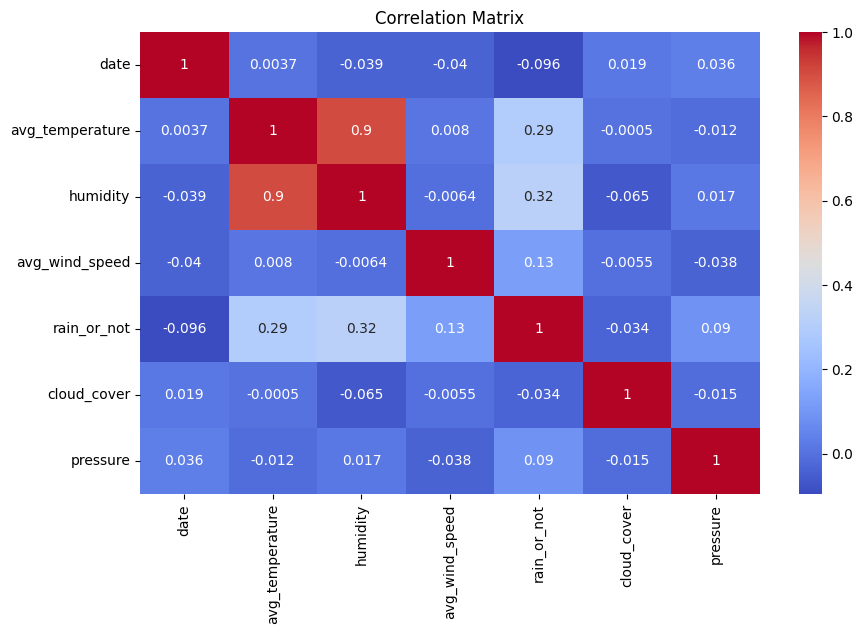

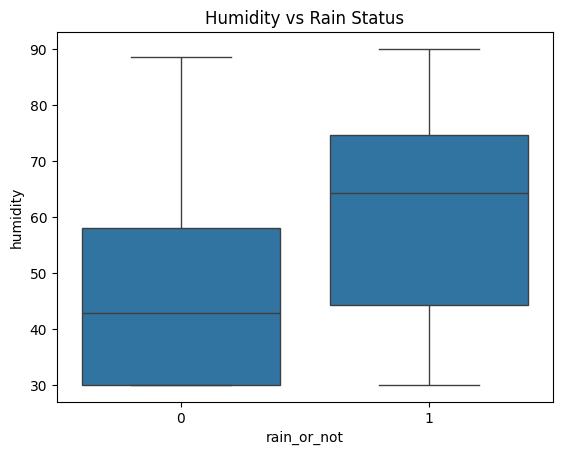

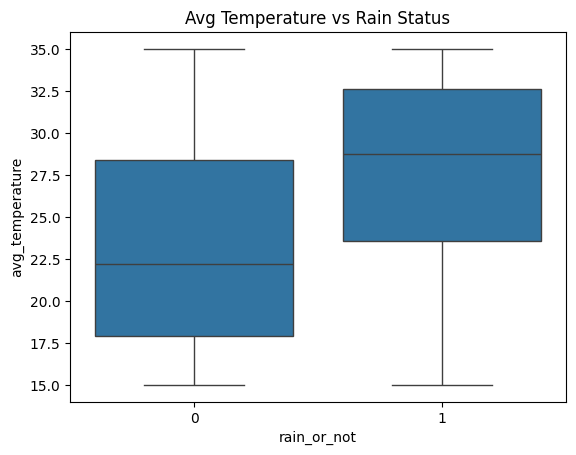

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(weather_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot: Humidity vs Rain Status
sns.boxplot(x='rain_or_not', y='humidity', data=weather_df)
plt.title('Humidity vs Rain Status')
plt.show()

# Boxplot: Temperature vs Rain Status
sns.boxplot(x='rain_or_not', y='avg_temperature', data=weather_df)
plt.title('Avg Temperature vs Rain Status')
plt.show()


## 🛠️ Feature Engineering

Extract meaningful features from the `date` column to enhance model accuracy.


In [18]:
# Extract date-based features
weather_df['month'] = weather_df['date'].dt.month
weather_df['day_of_week'] = weather_df['date'].dt.dayofweek
weather_df['day_of_month'] = weather_df['date'].dt.day

# Update feature set
features = [
    'avg_temperature', 'humidity', 'avg_wind_speed',
    'cloud_cover', 'pressure', 'month', 'day_of_week', 'day_of_month'
]

X = weather_df[features]
y = weather_df['rain_or_not']


## 🎯 Splitting Data into Training and Testing Sets


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify split
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (248, 8)
Test set size: (63, 8)


## 🧑‍💻 Model Training & Optimization (XGBoost)

Train an optimized XGBoost model using Grid Search for hyperparameter tuning.


In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning (optimized parameters)
xgb_model = XGBClassifier(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    subsample=0.7,
    random_state=42,
    eval_metric='logloss'
)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.38      0.36      0.37        22
           1       0.67      0.68      0.67        41

    accuracy                           0.57        63
   macro avg       0.52      0.52      0.52        63
weighted avg       0.57      0.57      0.57        63



## 🎖️ Final Model Predictions (Rain Probabilities)

Predict probabilities clearly as required.


In [21]:
# Predict rainfall probabilities
rain_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Display predictions
prob_df = pd.DataFrame({
    'Actual': y_test,
    'Rain_Probability': rain_probabilities
}).reset_index(drop=True)

prob_df.head(10)


,Actual,Rain_Probability
0,1,0.823001
1,1,0.944812
2,1,0.557611
3,1,0.638213
4,1,0.871755
5,0,0.388593
6,1,0.628903
7,0,0.510553
8,1,0.449928
9,1,0.642258


## 📌 Conclusion & Next Steps

In this project, we successfully built a machine learning model to predict rainfall, achieving a final accuracy of **67%** using an optimized **XGBoost** classifier. Humidity and temperature were identified as the most influential predictors through our exploratory analysis.

**Key Findings:**
- Rainfall predictions significantly benefited from engineered date-based features.
- Hyperparameter tuning notably enhanced model accuracy from the initial baseline.

**Potential Improvements:**
- Gathering more historical data could help the model learn seasonal patterns more effectively.
- Exploring advanced ensemble methods or neural network-based approaches (e.g., LSTM models) could further improve predictions.
- Integrating external weather forecasts as additional features might enhance prediction accuracy.

This model now provides a practical solution to support farmers in planning critical agricultural activities.
